In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
depreciation = pd.read_csv("Depreciation.csv",header=0)

In [3]:
depreciation.columns

Index(['Month-year', 'depreciation'], dtype='object')

In [19]:
#depreciation['region'].unique()

([], <a list of 0 Text xticklabel objects>)

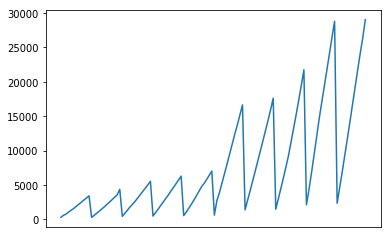

In [4]:
x= np.array(depreciation['Month-year'])
y= np.array(depreciation['depreciation'])
plt.plot(x,y)
plt.xticks([])

In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
# fix random seed for reproducibility
np.random.seed(7)

In [7]:
# load the dataset
#pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataframe = depreciation['depreciation']
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1, 1)

In [8]:
dataset

array([[  306.],
       [  612.],
       [  779.],
       [ 1077.],
       [ 1347.],
       [ 1596.],
       [ 1918.],
       [ 2218.],
       [ 2519.],
       [ 2828.],
       [ 3130.],
       [ 3439.],
       [  301.],
       [  602.],
       [  903.],
       [ 1211.],
       [ 1528.],
       [ 1844.],
       [ 2191.],
       [ 2527.],
       [ 2880.],
       [ 3231.],
       [ 3575.],
       [ 4387.],
       [  451.],
       [  900.],
       [ 1354.],
       [ 1823.],
       [ 2211.],
       [ 2639.],
       [ 3117.],
       [ 3595.],
       [ 4074.],
       [ 4554.],
       [ 5046.],
       [ 5540.],
       [  501.],
       [  996.],
       [ 1494.],
       [ 2018.],
       [ 2535.],
       [ 3056.],
       [ 3562.],
       [ 4121.],
       [ 4645.],
       [ 5194.],
       [ 5742.],
       [ 6297.],
       [  560.],
       [ 1077.],
       [ 1635.],
       [ 2224.],
       [ 2827.],
       [ 3465.],
       [ 4108.],
       [ 4764.],
       [ 5237.],
       [ 5831.],
       [ 6425.

In [33]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [34]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [35]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [36]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [37]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 4s - loss: 0.0198
Epoch 2/100
 - 0s - loss: 0.0131
Epoch 3/100
 - 0s - loss: 0.0122
Epoch 4/100
 - 0s - loss: 0.0118
Epoch 5/100
 - 0s - loss: 0.0115
Epoch 6/100
 - 0s - loss: 0.0111
Epoch 7/100
 - 0s - loss: 0.0107
Epoch 8/100
 - 0s - loss: 0.0104
Epoch 9/100
 - 0s - loss: 0.0101
Epoch 10/100
 - 0s - loss: 0.0098
Epoch 11/100
 - 0s - loss: 0.0095
Epoch 12/100
 - 0s - loss: 0.0093
Epoch 13/100
 - 0s - loss: 0.0089
Epoch 14/100
 - 0s - loss: 0.0086
Epoch 15/100
 - 0s - loss: 0.0082
Epoch 16/100
 - 0s - loss: 0.0080
Epoch 17/100
 - 0s - loss: 0.0079
Epoch 18/100
 - 0s - loss: 0.0075
Epoch 19/100
 - 0s - loss: 0.0074
Epoch 20/100
 - 0s - loss: 0.0071
Epoch 21/100
 - 0s - loss: 0.0070
Epoch 22/100
 - 0s - loss: 0.0068
Epoch 23/100
 - 0s - loss: 0.0067
Epoch 24/100
 - 0s - loss: 0.0066
Epoch 25/100
 - 0s - loss: 0.0066
Epoch 26/100
 - 0s - loss: 0.0064
Epoch 27/100
 - 0s - loss: 0.0065
Epoch 28/100
 - 0s - loss: 0.0062
Epoch 29/100
 - 0s - loss: 0.0061
Epoch 30/100
 - 0s - lo

In [38]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [39]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [40]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2153.23 RMSE
Test Score: 6196.22 RMSE


In [41]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [42]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

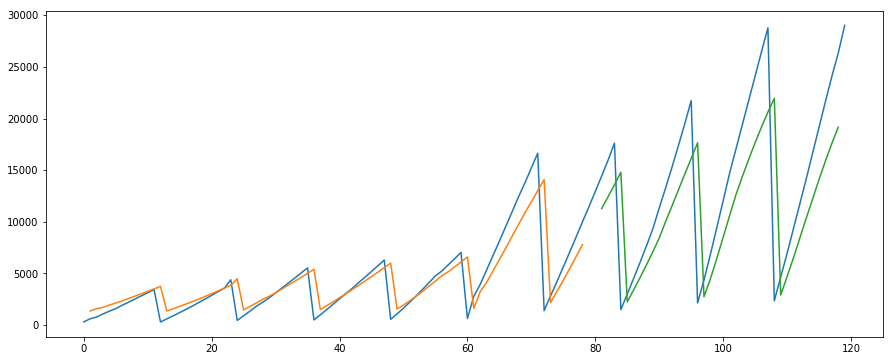

In [43]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()